In [1]:
import pandas as pd

data = pd.read_csv('sales_data.csv')
print(data.head())


         Date     Product     Category  Quantity  Price  Total_Sales
0  2025-01-01      Laptop  Electronics         3    800         2400
1  2025-01-02  Smartphone  Electronics         5    600         3000
2  2025-01-03  Headphones  Accessories        10     50          500
3  2025-01-04  Desk Chair    Furniture         2    120          240
4  2025-01-05     Monitor  Electronics         4    200          800


In [2]:
data.isnull().sum()


,0
Date,0
Product,0
Category,0
Quantity,0
Price,0
Total_Sales,0


In [3]:
data.dropna(inplace=True)


In [4]:
data.drop_duplicates(inplace=True)


In [5]:
data['Date'] = pd.to_datetime(data['Date'])


In [7]:
from scipy.stats import zscore
data = data[(zscore(data['Total_Sales']) < 3)]

In [8]:
data.to_csv('clean_sales_data.csv', index=False)


In [9]:
print(data.describe())


                                Date   Quantity       Price  Total_Sales
count                             35  35.000000   35.000000    35.000000
mean   2025-02-01 06:51:25.714285824   5.600000  293.428571  1243.142857
min              2025-01-01 00:00:00   1.000000   10.000000   150.000000
25%              2025-01-09 12:00:00   3.000000   52.500000   360.000000
50%              2025-02-03 00:00:00   5.000000  200.000000   560.000000
75%              2025-03-01 12:00:00   7.500000  460.000000  1810.000000
max              2025-03-10 00:00:00  15.000000  950.000000  4900.000000
std                              NaN   3.599019  282.706903  1328.250777


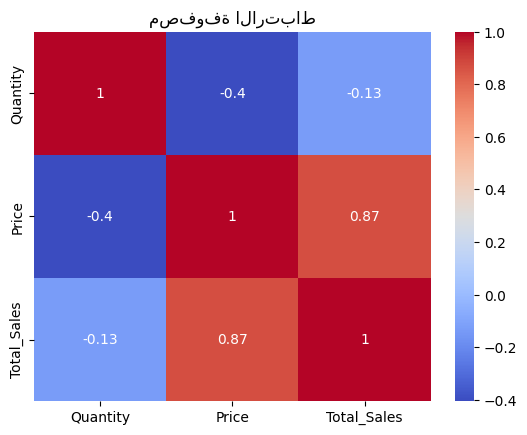

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("مصفوفة الارتباط")
plt.show()


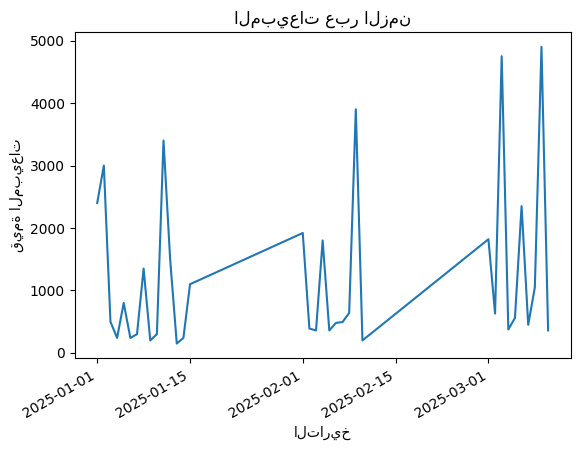

In [12]:
data.groupby('Date')['Total_Sales'].sum().plot(kind='line')
plt.title('المبيعات عبر الزمن')
plt.xlabel('التاريخ')
plt.ylabel('قيمة المبيعات')
plt.show()

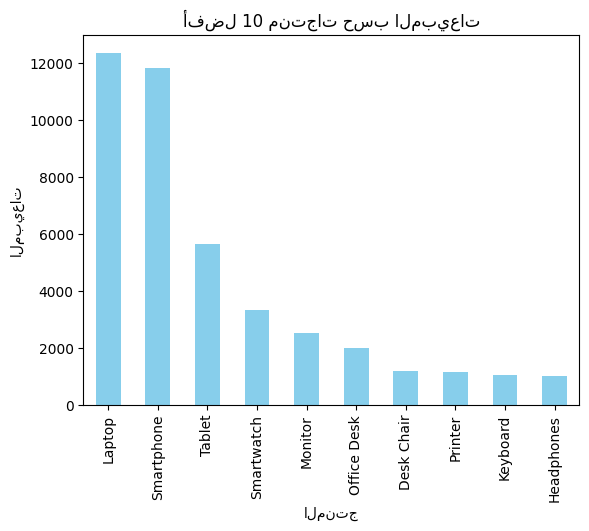

In [14]:
top_products = data.groupby('Product')['Total_Sales'].sum().nlargest(10)
top_products.plot(kind='bar', color='skyblue')
plt.title('أفضل 10 منتجات حسب المبيعات')
plt.xlabel('المنتج')
plt.ylabel('المبيعات')
plt.show()